# Linear Regression on House Prices (1D) with Keras

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `Y_train`

In [1]:
import pandas as pd
import numpy as np
from numpy import transpose
from numpy import append
from numpy import reshape
import matplotlib.pyplot as plt
# %matplotlib notebook
import seaborn as sns

np.random.seed(42)
# tf.random.set_seed(42)
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('sources/train.csv')

data.fillna(0, inplace=True)
data['Surface'] = data['GrLivArea'] + data['TotalBsmtSF']

Y_train = data.SalePrice.values.astype(float)

X_train = transpose([data.Surface.values.astype(int)])
X_train_overallqual = transpose([data.OverallQual.values.astype(int)])
X_train = append(X_train, values=X_train_overallqual, axis=1)
print(f"X train {X_train.shape}")
print(f"Y train {Y_train.shape}")
print(X_train)

X train (1460, 2)
Y train (1460,)
[[2566    7]
 [2524    6]
 [2706    7]
 ...
 [3492    7]
 [2156    5]
 [2512    5]]


## Dataviz X_train Y_train

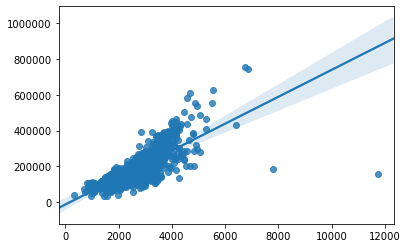

In [3]:
sns.regplot(x = X_train[:,0], y = Y_train)

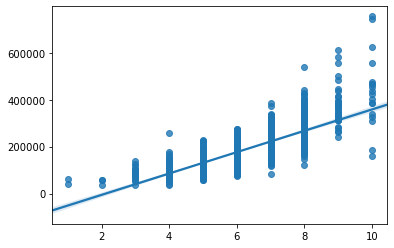

In [4]:
sns.regplot(x = X_train[:,1], y = Y_train)

## Model Sequential avec Keras
Define input layer. Number of neurons = number of features in `x`.

Define output layer, with 1 neuron.
`Dense` creates _fully-connected_ layer.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
model = Sequential()
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(1)
])

### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

## Set up optimizer and "compile" model
In Keras, optimizer is specified when "compiling" model.
(Last step to fix model training code!)

In [7]:
from tensorflow.keras.optimizers import SGD
loss="mse"
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

## Fit model (i.e. run optimization)

The model still hasn't "seen" any data yet...

* With SGD we can choose the amount of data to be used to compute the loss function (`BATCH_SIZE`). This can be useful when the whole dataset doesn't fit in memory. We'll revisit this later!
* We need to choose for how many iterations to run SGD (`EPOCHS`).
* The `fit` method is a loop over epochs and batches!

In [8]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 2000 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/2000
1460/1460 [==============================] - 0s 259us/sample - loss: 39039381504.0000
Epoch 2/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38877544448.0000
Epoch 3/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38716432384.0000
Epoch 4/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38556049408.0000
Epoch 5/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38396387328.0000
Epoch 6/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 38237446144.0000
Epoch 7/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 38079213568.0000
Epoch 8/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 37921701888.0000
Epoch 9/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 37764894720.0000
Epoch 10/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 37608796160.0000
Epoch

Epoch 85/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 27687585792.0000
Epoch 86/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27576414208.0000
Epoch 87/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 27465738240.0000
Epoch 88/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27355557888.0000
Epoch 89/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 27245858816.0000
Epoch 90/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 27136638976.0000
Epoch 91/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 27027910656.0000
Epoch 92/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 26919657472.0000
Epoch 93/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 26811887616.0000
Epoch 94/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 26704586752.0000
Epoch 95/2000
1460/1

Epoch 168/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19942334464.0000
Epoch 169/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19865124864.0000
Epoch 170/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19788247040.0000
Epoch 171/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19711711232.0000
Epoch 172/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19635505152.0000
Epoch 173/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19559624704.0000
Epoch 174/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19484078080.0000
Epoch 175/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19408857088.0000
Epoch 176/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19333965824.0000
Epoch 177/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 19259398144.0000
Epoch 178/

Epoch 251/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14548435968.0000
Epoch 252/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14494510080.0000
Epoch 253/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14440809472.0000
Epoch 254/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14387343360.0000
Epoch 255/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14334101504.0000
Epoch 256/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 14281095168.0000
Epoch 257/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14228310016.0000
Epoch 258/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14175752192.0000
Epoch 259/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14123420672.0000
Epoch 260/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 14071311360.0000
Epoch 261/

Epoch 334/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 10772425728.0000
Epoch 335/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10734580736.0000
Epoch 336/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 10696893440.0000
Epoch 337/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 10659367936.0000
Epoch 338/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 10622001152.0000
Epoch 339/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 10584788992.0000
Epoch 340/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10547737600.0000
Epoch 341/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 10510845952.0000
Epoch 342/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10474104832.0000
Epoch 343/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 10437518336.0000
Epoch 344/

Epoch 418/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 8090740736.0000
Epoch 419/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 8064186368.0000
Epoch 420/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 8037743104.0000
Epoch 421/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 8011410944.0000
Epoch 422/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 7985188352.0000
Epoch 423/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 7959077376.0000
Epoch 424/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 7933074944.0000
Epoch 425/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7907180032.0000
Epoch 426/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7881393152.0000
Epoch 427/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 7855717888.0000
Epoch 428/2000
1460/

Epoch 502/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 6206114816.0000
Epoch 503/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6187420160.0000
Epoch 504/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6168802816.0000
Epoch 505/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6150263296.0000
Epoch 506/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 6131800064.0000
Epoch 507/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6113414144.0000
Epoch 508/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6095105024.0000
Epoch 509/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 6076871168.0000
Epoch 510/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 6058713088.0000
Epoch 511/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 6040630784.0000
Epoch 512/2000
1460/

Epoch 586/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4877533696.0000
Epoch 587/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4864336384.0000
Epoch 588/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4851192832.0000
Epoch 589/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4838103040.0000
Epoch 590/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 4825068032.0000
Epoch 591/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4812085248.0000
Epoch 592/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 4799157760.0000
Epoch 593/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4786283520.0000
Epoch 594/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 4773461504.0000
Epoch 595/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 4760692736.0000
Epoch 596/2000
1460/

Epoch 670/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3938564096.0000
Epoch 671/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3929225472.0000
Epoch 672/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3919924736.0000
Epoch 673/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3910661376.0000
Epoch 674/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3901437696.0000
Epoch 675/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3892251904.0000
Epoch 676/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3883103232.0000
Epoch 677/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 3873992704.0000
Epoch 678/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3864919808.0000
Epoch 679/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3855883264.0000
Epoch 680/2000
1460/

Epoch 754/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3273564416.0000
Epoch 755/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3266943488.0000
Epoch 756/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3260350976.0000
Epoch 757/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3253784832.0000
Epoch 758/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 3247245312.0000
Epoch 759/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3240732160.0000
Epoch 760/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 3234246144.0000
Epoch 761/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3227787264.0000
Epoch 762/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 3221353984.0000
Epoch 763/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 3214946816.0000
Epoch 764/2000
1460/

Epoch 838/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2801801984.0000
Epoch 839/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2797102080.0000
Epoch 840/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2792420864.0000
Epoch 841/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2787759360.0000
Epoch 842/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2783115776.0000
Epoch 843/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2778491648.0000
Epoch 844/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2773885952.0000
Epoch 845/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2769299712.0000
Epoch 846/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2764731648.0000
Epoch 847/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2760182272.0000
Epoch 848/2000
1460/

Epoch 922/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2466669312.0000
Epoch 923/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2463328256.0000
Epoch 924/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2460001024.0000
Epoch 925/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 2456687360.0000
Epoch 926/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2453386752.0000
Epoch 927/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2450098688.0000
Epoch 928/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2446824704.0000
Epoch 929/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2443564032.0000
Epoch 930/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2440316160.0000
Epoch 931/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2437081600.0000
Epoch 932/2000
1460/

Epoch 1006/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 2228322304.0000
Epoch 1007/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2225944832.0000
Epoch 1008/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2223577344.0000
Epoch 1009/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2221219328.0000
Epoch 1010/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2218870784.0000
Epoch 1011/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2216531712.0000
Epoch 1012/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2214202112.0000
Epoch 1013/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 2211881216.0000
Epoch 1014/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2209570048.0000
Epoch 1015/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2207268608.0000
Epoch 1016

Epoch 1089/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2060360576.0000
Epoch 1090/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2058660864.0000
Epoch 1091/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2056968192.0000
Epoch 1092/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2055282176.0000
Epoch 1093/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2053602816.0000
Epoch 1094/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2051929984.0000
Epoch 1095/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2050264448.0000
Epoch 1096/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 2048605056.0000
Epoch 1097/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2046952832.0000
Epoch 1098/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 2045306880.0000
Epoch 1099

Epoch 1172/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1940228864.0000
Epoch 1173/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1939012736.0000
Epoch 1174/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1937801472.0000
Epoch 1175/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1936595200.0000
Epoch 1176/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1935393408.0000
Epoch 1177/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1934196992.0000
Epoch 1178/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1933005184.0000
Epoch 1179/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1931817600.0000
Epoch 1180/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1930635264.0000
Epoch 1181/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1929457536.0000
Epoch 1182

Epoch 1255/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1854258304.0000
Epoch 1256/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1853387904.0000
Epoch 1257/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1852520832.0000
Epoch 1258/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1851656960.0000
Epoch 1259/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1850797184.0000
Epoch 1260/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1849940480.0000
Epoch 1261/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1849087488.0000
Epoch 1262/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1848237312.0000
Epoch 1263/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1847390848.0000
Epoch 1264/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1846547840.0000
Epoch 1265

Epoch 1338/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1792706816.0000
Epoch 1339/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1792083328.0000
Epoch 1340/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1791462656.0000
Epoch 1341/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1790843904.0000
Epoch 1342/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1790227840.0000
Epoch 1343/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1789614592.0000
Epoch 1344/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1789003392.0000
Epoch 1345/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1788394880.0000
Epoch 1346/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1787789056.0000
Epoch 1347/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1787185152.0000
Epoch 1348

Epoch 1421/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1748620800.0000
Epoch 1422/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1748174464.0000
Epoch 1423/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1747729664.0000
Epoch 1424/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1747286144.0000
Epoch 1425/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1746845184.0000
Epoch 1426/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1746405888.0000
Epoch 1427/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1745968128.0000
Epoch 1428/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1745532288.0000
Epoch 1429/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1745097984.0000
Epoch 1430/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1744665600.0000
Epoch 1431

Epoch 1504/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1717033344.0000
Epoch 1505/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1716713344.0000
Epoch 1506/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1716394880.0000
Epoch 1507/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1716077184.0000
Epoch 1508/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1715761024.0000
Epoch 1509/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1715445888.0000
Epoch 1510/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1715132288.0000
Epoch 1511/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1714819840.0000
Epoch 1512/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1714508800.0000
Epoch 1513/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1714198784.0000
Epoch 1514

Epoch 1587/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1694395520.0000
Epoch 1588/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1694166528.0000
Epoch 1589/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1693937408.0000
Epoch 1590/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1693710208.0000
Epoch 1591/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1693483648.0000
Epoch 1592/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1693257728.0000
Epoch 1593/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1693032960.0000
Epoch 1594/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1692809216.0000
Epoch 1595/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1692586112.0000
Epoch 1596/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1692363776.0000
Epoch 1597

Epoch 1670/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1678167040.0000
Epoch 1671/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1678002944.0000
Epoch 1672/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1677838720.0000
Epoch 1673/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1677675776.0000
Epoch 1674/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1677512960.0000
Epoch 1675/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1677351168.0000
Epoch 1676/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1677189888.0000
Epoch 1677/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1677029760.0000
Epoch 1678/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1676869632.0000
Epoch 1679/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1676710400.0000
Epoch 1680

Epoch 1753/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1666531328.0000
Epoch 1754/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1666413312.0000
Epoch 1755/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1666295680.0000
Epoch 1756/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1666178944.0000
Epoch 1757/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1666062336.0000
Epoch 1758/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1665946368.0000
Epoch 1759/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1665830656.0000
Epoch 1760/2000
1460/1460 [==============================] - 0s 3us/sample - loss: 1665715456.0000
Epoch 1761/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1665600640.0000
Epoch 1762/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1665486848.0000
Epoch 1763

Epoch 1836/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1658186496.0000
Epoch 1837/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1658101760.0000
Epoch 1838/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1658017152.0000
Epoch 1839/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657933440.0000
Epoch 1840/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657850240.0000
Epoch 1841/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657767040.0000
Epoch 1842/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657684224.0000
Epoch 1843/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657601280.0000
Epoch 1844/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657519104.0000
Epoch 1845/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1657437184.0000
Epoch 1846

Epoch 1919/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1652201344.0000
Epoch 1920/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1652141056.0000
Epoch 1921/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1652080128.0000
Epoch 1922/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1652019968.0000
Epoch 1923/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1651960064.0000
Epoch 1924/2000
1460/1460 [==============================] - 0s 1us/sample - loss: 1651900544.0000
Epoch 1925/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1651841024.0000
Epoch 1926/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1651781760.0000
Epoch 1927/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1651722880.0000
Epoch 1928/2000
1460/1460 [==============================] - 0s 2us/sample - loss: 1651663744.0000
Epoch 1929

## Review learning curve

In [9]:
hist = pd.DataFrame(history.history)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


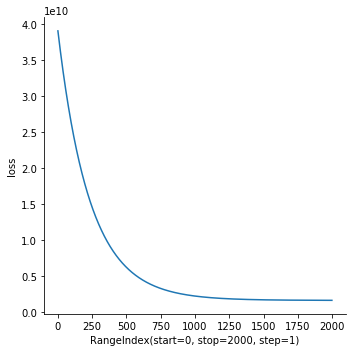

In [10]:
sns.relplot(x=hist.index, y="loss", kind="line", data=hist)

## Prepare for Kaggle submisison

In [11]:
data_test= pd.read_csv('sources/test.csv')

data_test.fillna(0, inplace=True)
data_test['Surface'] = data_test['GrLivArea'] + data_test['TotalBsmtSF']

X_test = transpose([data_test.Surface.values.astype(int)])
X_test.shape
X_test_overallqual = transpose([data_test.OverallQual.values.astype(int)])
X_test = append(X_test, values=X_test_overallqual, axis=1)
print(f"X test {X_test.shape}")
print(X_test)

X test (1459, 2)
[[1778    5]
 [2658    6]
 [2557    5]
 ...
 [2448    5]
 [1882    5]
 [2996    7]]


In [12]:
X_test = scaler.transform(X_test) # On applique le scaler sur les Surfaces du dataset de test

In [13]:
Y_test = model.predict(x=X_test)
Y_test = np.reshape(Y_test, Y_test.shape[0],)

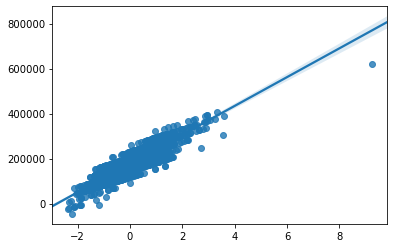

In [14]:
sns.regplot(x = X_test[:,0], y = Y_test)

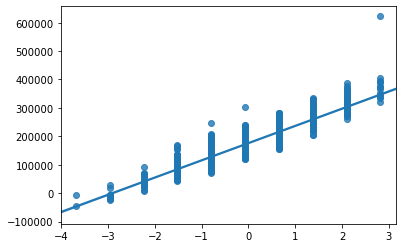

In [15]:
sns.regplot(x = X_test[:,1], y = Y_test)

In [16]:
data_test['SalePrice'] = Y_test
data_test.drop(data_test.columns.difference(['Id','SalePrice']), 1, inplace=True)
data_test.to_csv('storage/kaggle_submission_file.csv', index=False)